In [1]:
import pandas as pd
import numpy as np

In [2]:
DATASET_DIR = "../dataset/classification/newsgroups"
DATA_HEADER = ["news_id", "word_id", "counts"]
MAP_HEADER = ["subcategory_name", "subcategory_id"]
LABEL_HEADER = ["subcategory_id"]

In [3]:
from scipy.sparse import csr_matrix

def sparse_pivot(df, index, columns, values):
    row_cat = pd.api.types.CategoricalDtype(categories=sorted(df[index].unique()), ordered=True)
    col_cat = pd.api.types.CategoricalDtype(categories=sorted(df[columns].unique()), ordered=True)
    row = df[index].astype(row_cat).cat.codes
    col = df[columns].astype(col_cat).cat.codes
    sparse_matrix = csr_matrix((df[values], (row, col)), \
                                shape=(row_cat.categories.size, \
                                       col_cat.categories.size))
    df_pivot = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, 
                                                 index = row_cat.categories, 
                                                 columns = col_cat.categories)
    
    return df_pivot

In [4]:
train_data = pd.read_csv(f'{DATASET_DIR}/train.data', sep=" ", header=None, names=DATA_HEADER)
train_data

,news_id,word_id,counts
0,1,1,4
1,1,2,2
2,1,3,10
3,1,4,4
4,1,5,2
...,...,...,...
1467340,11269,47387,1
1467341,11269,48339,1
1467342,11269,48919,1
1467343,11269,51544,1


In [5]:
# train_data.pivot(index="news_id", columns="word_id", values="counts")
sparse_pivot(train_data, "news_id", "word_id", "counts")

,1,2,3,4,5,6,7,8,9,10,...,53966,53967,53968,53969,53970,53971,53972,53973,53974,53975
1,4,2,10,4,2,1,1,1,3,9,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [6]:
train_map = pd.read_csv(f'{DATASET_DIR}/train.map', sep=" ", header=None, names=MAP_HEADER)
train_map["topcategory_name"] = train_map["subcategory_name"].apply(lambda x:x.split(".")[0])

train_map

,subcategory_name,subcategory_id,topcategory_name
0,alt.atheism,1,alt
1,comp.graphics,2,comp
2,comp.os.ms-windows.misc,3,comp
3,comp.sys.ibm.pc.hardware,4,comp
4,comp.sys.mac.hardware,5,comp
5,comp.windows.x,6,comp
6,misc.forsale,7,misc
7,rec.autos,8,rec
8,rec.motorcycles,9,rec
9,rec.sport.baseball,10,rec


In [7]:
test_map = pd.read_csv(f'{DATASET_DIR}/test.map', sep=" ", header=None, names=MAP_HEADER)
test_map["topcategory_name"] = test_map["subcategory_name"].apply(lambda x:x.split(".")[0])

test_map

,subcategory_name,subcategory_id,topcategory_name
0,alt.atheism,1,alt
1,comp.graphics,2,comp
2,comp.os.ms-windows.misc,3,comp
3,comp.sys.ibm.pc.hardware,4,comp
4,comp.sys.mac.hardware,5,comp
5,comp.windows.x,6,comp
6,misc.forsale,7,misc
7,rec.autos,8,rec
8,rec.motorcycles,9,rec
9,rec.sport.baseball,10,rec


In [8]:
train_label = pd.read_csv(f'{DATASET_DIR}/train.label', sep=" ", header=None)
train_label.index += 1
train_label.columns = LABEL_HEADER
train_label

,subcategory_id
1,1
2,1
3,1
4,1
5,1
...,...
11265,20
11266,20
11267,20
11268,20


In [9]:
def get_data_label():
    # data取得
    long_train = pd.read_csv(f'{DATASET_DIR}/train.data', sep=" ", header=None, names=DATA_HEADER)
    long_test = pd.read_csv(f'{DATASET_DIR}/test.data', sep=" ", header=None, names=DATA_HEADER)
    train_max = long_train["news_id"].max()
    long_test["news_id"] += train_max  # idをずらす
    long_data = pd.concat([long_train,long_test], axis=0, sort=False)
    wide_data = sparse_pivot(long_data, "news_id", "word_id", "counts")
    # label取得
    label_train = pd.read_csv(f'{DATASET_DIR}/train.label', sep=" ", header=None)
    label_train.index += 1
    label_train.columns = LABEL_HEADER
    label_test = pd.read_csv(f'{DATASET_DIR}/test.label', sep=" ", header=None)
    label_test.index += 1 + train_max  # idをずらす
    label_test.columns = LABEL_HEADER
    label = pd.concat([label_train,label_test], axis=0, sort=False)
    
    return pd.concat([label, wide_data], axis=1, sort=False)


def get_map():
    train_map = pd.read_csv(f'{DATASET_DIR}/train.map', sep=" ", header=None, names=MAP_HEADER)
    train_map["topcategory_name"] = train_map["subcategory_name"].apply(lambda x:x.split(".")[0])
    
    return train_map[["subcategory_id", "topcategory_name"]]


def get_newsgroup_dataset():
    data = get_data_label()
    train_map = get_map()
    
    return pd.merge(train_map, data, how="right", on="subcategory_id")

In [10]:
df = get_newsgroup_dataset()

In [11]:
df

,subcategory_id,topcategory_name,1,2,3,4,5,6,7,8,...,61179,61180,61181,61182,61183,61184,61185,61186,61187,61188
0,1,alt,4,2,10,4,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,alt,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,alt,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,alt,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,alt,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18769,20,talk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18770,20,talk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18771,20,talk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18772,20,talk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
USE_CATEGORYS = ["rec", "talk", "sci"]
df.query('topcategory_name in @USE_CATEGORYS')

,subcategory_id,topcategory_name,1,2,3,4,5,6,7,8,...,61179,61180,61181,61182,61183,61184,61185,61186,61187,61188
6614,8,rec,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6615,8,rec,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6616,8,rec,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6617,8,rec,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6618,8,rec,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18769,20,talk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18770,20,talk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18771,20,talk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18772,20,talk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
mode="train"
# data取得
long_data = pd.read_csv(f'{DATASET_DIR}/{mode}.data', sep=" ", header=None, names=DATA_HEADER)
wide_data = sparse_pivot(long_data, "news_id", "word_id", "counts")
# label取得
label = pd.read_csv(f'{DATASET_DIR}/{mode}.label', sep=" ", header=None)
label.index += 1
label.columns = LABEL_HEADER

In [43]:
a = pd.concat([label, wide_data], axis=1, sort=False)

In [44]:
a

,subcategory_id,1,2,3,4,5,6,7,8,9,...,53966,53967,53968,53969,53970,53971,53972,53973,53974,53975
1,1,4,2,10,4,2,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11266,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11267,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11268,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [48]:
mode="test"
# data取得
long_data = pd.read_csv(f'{DATASET_DIR}/{mode}.data', sep=" ", header=None, names=DATA_HEADER)
wide_data = sparse_pivot(long_data, "news_id", "word_id", "counts")
# label取得
label = pd.read_csv(f'{DATASET_DIR}/{mode}.label', sep=" ", header=None)
label.index += 1
label.columns = LABEL_HEADER

In [49]:
wide_data

,1,2,3,4,5,6,7,8,9,10,...,61179,61180,61181,61182,61183,61184,61185,61186,61187,61188
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
def get_data_label():
    # data取得
    long_train = pd.read_csv(f'{DATASET_DIR}/train.data', sep=" ", header=None, names=DATA_HEADER)
    long_test = pd.read_csv(f'{DATASET_DIR}/test.data', sep=" ", header=None, names=DATA_HEADER)
    train_max = long_train["news_id"].max()
    long_test["news_id"] += train_max  # idをずらす
    long_data = pd.concat([long_train,long_test], axis=0, sort=False)
    wide_data = sparse_pivot(long_data, "news_id", "word_id", "counts")
    # label取得
    label_train = pd.read_csv(f'{DATASET_DIR}/train.label', sep=" ", header=None)
    label_train.index += 1
    label_train.columns = LABEL_HEADER
    label_test = pd.read_csv(f'{DATASET_DIR}/test.label', sep=" ", header=None)
    label_test.index += 1 + train_max  # idをずらす
    label_test.columns = LABEL_HEADER
    label = pd.concat([label_train,label_test], axis=0, sort=False)
    
    return pd.concat([label, wide_data], axis=1, sort=False)

In [61]:
wide_data

,1,2,3,4,5,6,7,8,9,10,...,61179,61180,61181,61182,61183,61184,61185,61186,61187,61188
1,4,2,10,4,2,1,1,1,3,9,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
label

,subcategory_id
1,1
2,1
3,1
4,1
5,1
...,...
18770,20
18771,20
18772,20
18773,20


In [69]:
pd.concat([label, wide_data], axis=1, sort=False)

,subcategory_id,1,2,3,4,5,6,7,8,9,...,61179,61180,61181,61182,61183,61184,61185,61186,61187,61188
1,1,4,2,10,4,2,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18770,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18771,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18772,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18773,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x = df.drop(columns=["subcategory_id", "topcategory_name"])
x

,1,2,3,4,5,6,7,8,9,10,...,61179,61180,61181,61182,61183,61184,61185,61186,61187,61188
0,4,2,10,4,2,1,1,1,3,9,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
x_sum = x.sum(axis=0)
x_sum

1         497
2        2084
3         490
4         419
5         537
         ... 
61184       2
61185       2
61186       2
61187       2
61188       2
Length: 61188, dtype: int64

In [17]:
(x_sum<=2).sum()

14786

In [18]:
is_not0 = (x>0).sum(axis=0)
is_not0

1         200
2        1244
3         182
4         228
5         324
         ... 
61184       1
61185       1
61186       1
61187       2
61188       1
Length: 61188, dtype: int64

In [29]:
(is_not0<=1).sum(), (is_not0<=2).sum(), (is_not0<=3).sum(), (is_not0<=4).sum(), (is_not0<=5).sum(), (is_not0<=10).sum()

(5277, 19657, 27082, 31828, 35384, 43969)

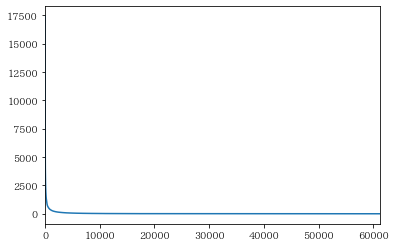

In [25]:
is_not0.sort_values(ascending=False).reset_index(drop=True).plot()

In [33]:
X = x.loc[:,is_not0>10]
y = df["subcategory_id"]
domain = df["topcategory_name"]

In [35]:
domain

0         alt
1         alt
2         alt
3         alt
4         alt
         ... 
18769    talk
18770    talk
18771    talk
18772    talk
18773    talk
Name: topcategory_name, Length: 18774, dtype: object

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, y_train)
pred = gbdt.predict(X_test)

In [47]:
accuracy_score(y_test, pred)

0.7999289898810581